In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 1.
¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [14]:
#abrimos la base de datos. vamos a usar el csv con casos nulos ya que si no no podremos hacer el ejercicio 2
db_sharks = pd.read_csv('../visualizacion/attacks_1_2.csv')
db_sharks.head(3)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,pdf,href_formula,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [15]:
#sacamos las frecuencias.
sex = db_sharks["sex_"].value_counts()
sex

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

* Gráfica de frecuencias:

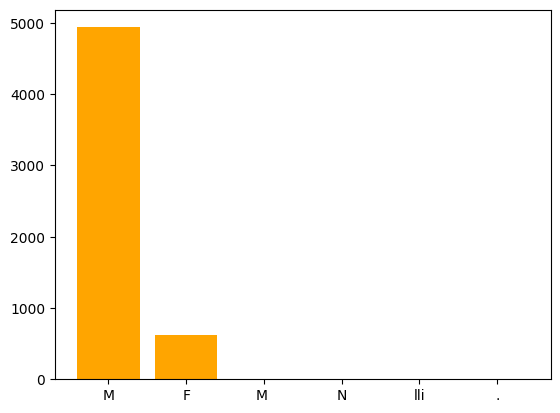

In [16]:
x = sex.index
y = sex.values

plt.figure()
plt.bar(x, y, color='orange')
plt.show();

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

* Porcentaje de nulos:

In [17]:
null_por = db_sharks.isnull().mean()*100
#redondeamos y ordenamos para facilitar la legibilidad de los resultados
null_por = null_por.round(2).sort_values()
null_por


year             0.00
pdf              0.00
href             0.00
case_number      0.02
href_formula     0.02
type             0.07
country          0.65
name             3.27
area             6.67
location         7.98
activity         8.36
sex_             9.00
age             43.60
species_        44.24
time            52.01
dtype: float64

In [18]:
#vamos a almacenar los resultados en un diccionario para usar las keys y valores en la elaboración de gráficos.
#optamos por un diccionario ya que no es una columna que exista en nuestro dataframe.
dicc_null = null_por.to_dict()
dicc_null

{'year': 0.0,
 'pdf': 0.0,
 'href': 0.0,
 'case_number': 0.02,
 'href_formula': 0.02,
 'type': 0.07,
 'country': 0.65,
 'name': 3.27,
 'area': 6.67,
 'location': 7.98,
 'activity': 8.36,
 'sex_': 9.0,
 'age': 43.6,
 'species_': 44.24,
 'time': 52.01}

In [19]:
#comprobamos las keys de nuestro nuevo diccionario
dicc_null.keys()

dict_keys(['year', 'pdf', 'href', 'case_number', 'href_formula', 'type', 'country', 'name', 'area', 'location', 'activity', 'sex_', 'age', 'species_', 'time'])

In [20]:
#ídem con los valores
dicc_null.values()

dict_values([0.0, 0.0, 0.0, 0.02, 0.02, 0.07, 0.65, 3.27, 6.67, 7.98, 8.36, 9.0, 43.6, 44.24, 52.01])

* Pie chart.

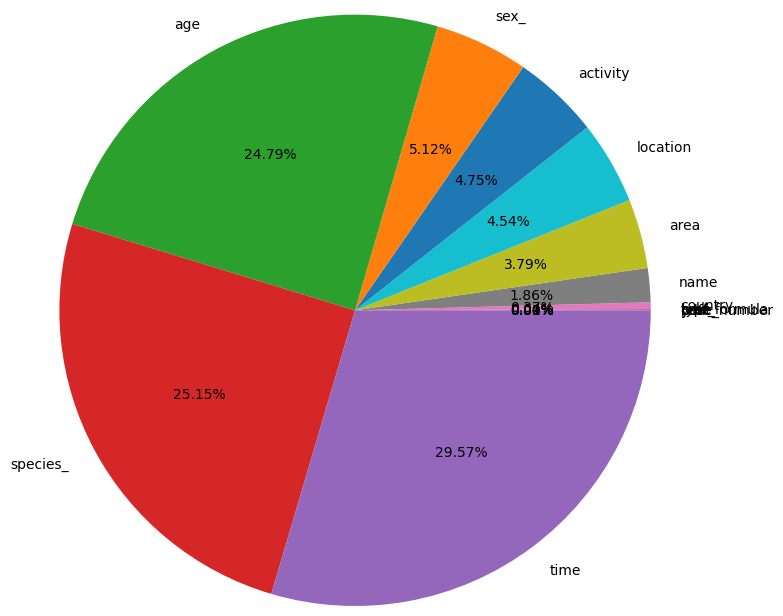

In [40]:
plt.figure() #invocamos la figura
plt.pie(dicc_null.values(), labels = dicc_null.keys(), autopct='%1.2f%%', radius=2)
plt.show();

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [44]:
nunique_columns = db_sharks.nunique()
nunique_columns

case_number     6113
year             207
type               8
country          201
area             791
location        4020
activity        1484
name            5118
sex_               6
age              156
time             366
species_        1529
pdf             6105
href_formula    6104
href            6099
dtype: int64

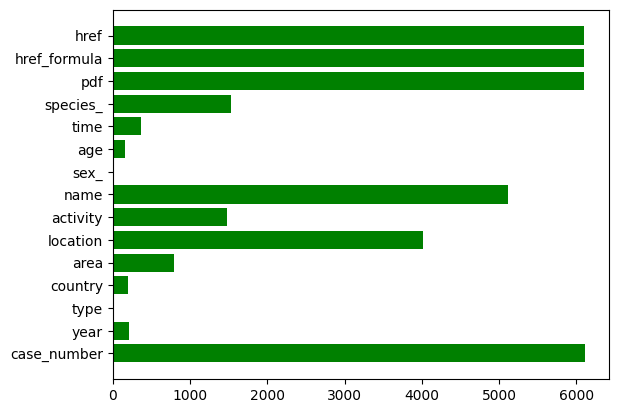

In [47]:
plt.figure()
plt.barh(nunique_columns.index, nunique_columns.values, color='green')
plt.show();

4. Filtrad los datos para quedarnos solo con los datos de USA.


In [23]:
at_usa = db_sharks[db_sharks["country"] == "USA"]
at_usa.head(3)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,pdf,href_formula,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [24]:
#comprobamos que el filtro ha funcionado, pidiendo que nos muestre los casos únicos para país.
at_usa["country"].unique()

array(['USA'], dtype=object)

* ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [53]:
at_usa_year = at_usa[at_usa["year"] >= 2000]
at_usa_year.head(3)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,pdf,href_formula,href
0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [54]:
#comprobamos que el filtro ha funcionado, pidiendo que nos muestre los casos únicos para país.
at_usa_year["country"].unique()

array(['USA'], dtype=object)

In [56]:
#de nuevo, comprobamos que todos los valores son igual o superior a 2000
at_usa_year["year"].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

In [60]:
#hacemos la consulta necesaria para la gráfica
at_usa_2000 = at_usa_year['year'].value_counts()
at_usa_2000

2015    73
2007    66
2014    65
2017    65
2016    64
2012    63
2008    60
2013    59
2001    58
2003    57
2006    54
2000    52
2005    52
2002    49
2011    48
2009    41
2010    40
2004    35
2018    10
Name: year, dtype: int64

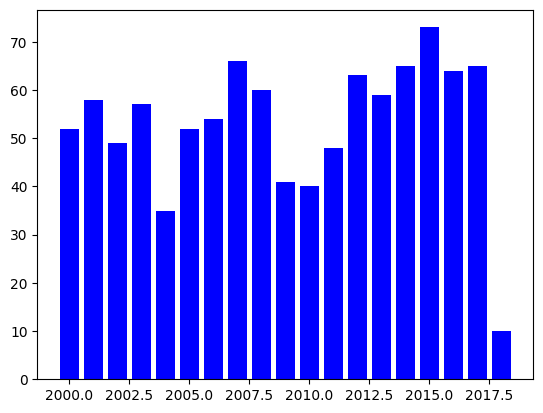

In [61]:
x = at_usa_2000.values
y = at_usa_2000.index
plt.figure()
plt.bar(y, x, color='blue') 
plt.show()

* En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.


In [30]:
tipos_usa = at_usa["type"].value_counts()
tipos_usa

Unprovoked      843
Invalid          68
Provoked         61
Boating          32
Boat              5
Sea Disaster      2
Name: type, dtype: int64

In [35]:
dicc_tipos_usa = tipos_usa.to_dict()
dicc_tipos_usa

{'Unprovoked': 843,
 'Invalid': 68,
 'Provoked': 61,
 'Boating': 32,
 'Boat': 5,
 'Sea Disaster': 2}

* Gráfico de líneas:

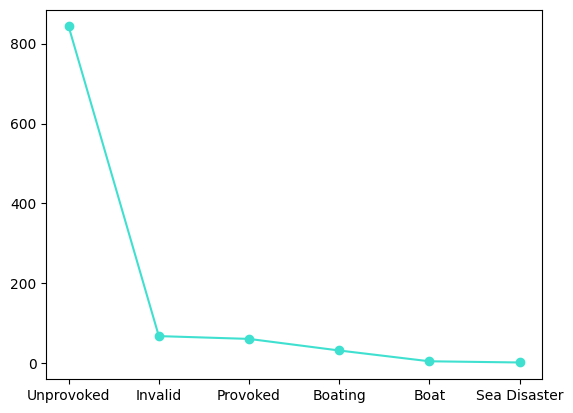

In [36]:
plt.figure()
plt.plot(dicc_tipos_usa.keys(), dicc_tipos_usa.values(), color='turquoise', marker='o')
plt.show()

5. Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [63]:
at_spa = db_sharks[db_sharks["country"] == "SPAIN"][db_sharks["year"] >= 2000]
at_spa.head(2)

C:\Users\PcCom\AppData\Local\Temp\ipykernel_10792\152473124.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  at_spa = db_sharks[db_sharks["country"] == "SPAIN"][db_sharks["year"] >= 2000]


,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,pdf,href_formula,href
82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",2017.09.16.b-GrandCanary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [64]:
#contamos el número de casos
print(f'En España hubo un total de {at_spa.shape[0]} ataques de tiburón.')

En España hubo un total de 16 ataques de tiburón.


In [65]:
at_spa_year = at_spa['year'].value_counts()
at_spa_year

2017.0    4
2014.0    4
2016.0    2
2015.0    2
2013.0    1
2010.0    1
2009.0    1
2006.0    1
Name: year, dtype: int64

In [ ]:
at_spa_year['at_spa_year'] = at_spa_year['at_spa_year']

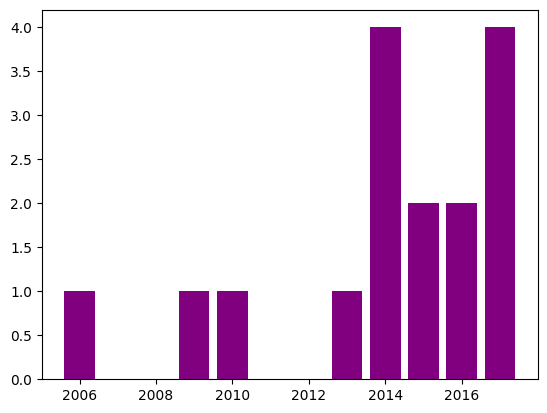

In [66]:
plt.figure()
plt.bar(at_spa_year.index, at_spa_year.values, color='purple')
plt.show()

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [70]:
at_spa['type'].value_counts()

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64

        Ahora, para hacer el gráfico, vamos a crear un diccionario (en el ejercicio anterior hicimos un DataFrame):

In [71]:
#Creamos el diccionario:
dicc_at_spa_tipo = at_spa["type"].value_counts().to_dict()
dicc_at_spa_tipo

{'Unprovoked': 9, 'Invalid': 5, 'Provoked': 2}

In [72]:
dicc_at_spa_tipo.keys()

dict_keys(['Unprovoked', 'Invalid', 'Provoked'])

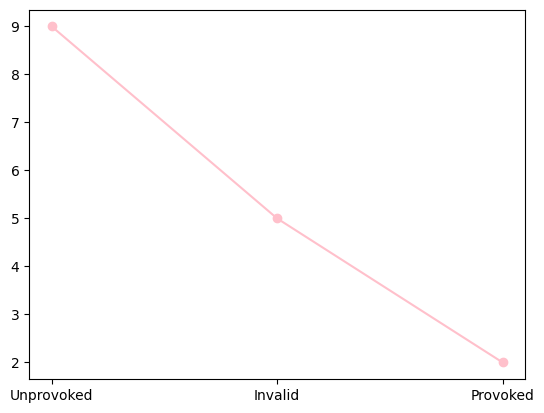

In [73]:
#creamos la figura:
plt.figure()
plt.plot(dicc_at_spa_tipo.keys(), dicc_at_spa_tipo.values(), color='pink', marker='o')
plt.show()